In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 


C:\Users\tony3\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\tony3\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\tony3\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
historical_spending = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-02-13/historical_spending.csv")
gifts_age = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-02-13/gifts_age.csv")
gifts_gender = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/main/data/2024/2024-02-13/gifts_gender.csv")


In [100]:
historical_spending

,Year,PercentCelebrating,PerPerson,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,2010,60,103.00,8.60,12.33,21.52,5.91,23.76,10.93,8.42
1,2011,58,116.21,10.75,12.62,26.18,8.09,24.86,12.00,11.21
2,2012,59,126.03,10.85,13.49,29.60,6.93,25.66,10.42,8.43
3,2013,60,130.97,11.64,13.48,30.94,8.32,27.93,11.46,10.23
4,2014,54,133.91,10.80,15.00,30.58,7.97,27.48,13.37,9.00
5,2015,55,142.31,12.70,15.72,36.30,7.87,27.27,14.72,11.05
6,2016,55,146.84,13.11,14.78,33.11,8.52,33.46,15.05,12.52
7,2017,54,136.57,12.68,14.63,32.32,7.36,28.46,13.91,10.23
8,2018,55,143.56,13.12,14.75,34.10,6.55,26.96,14.04,11.04
9,2019,51,161.96,14.12,15.07,30.34,7.31,27.72,16.08,10.31


In [96]:
gifts_age

,Age,SpendingCelebrating,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,18-24,51,70,50,33,33,41,33,23
1,25-34,40,62,44,34,33,37,27,19
2,35-44,31,58,41,29,42,30,26,22
3,45-54,19,60,37,20,42,31,20,23
4,55-64,18,50,32,13,43,29,19,20
5,65+,13,42,25,8,44,24,12,20


In [98]:
gifts_gender

,Gender,SpendingCelebrating,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,Men,27,52,56,30,37,33,20,18
1,Women,27,59,19,14,43,29,24,24


In [16]:
historical_spending.info()
gifts_age.info()
gifts_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                13 non-null     int64  
 1   PercentCelebrating  13 non-null     int64  
 2   PerPerson           13 non-null     float64
 3   Candy               13 non-null     float64
 4   Flowers             13 non-null     float64
 5   Jewelry             13 non-null     float64
 6   GreetingCards       13 non-null     float64
 7   EveningOut          13 non-null     float64
 8   Clothing            13 non-null     float64
 9   GiftCards           13 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 1.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  6 non-null      object
 1   Spendin

In [33]:
print(historical_spending.describe())
print(gifts_age.describe())
print(gifts_gender.describe())

             Year  PercentCelebrating   PerPerson      Candy    Flowers  \
count    13.00000           13.000000   13.000000  13.000000  13.000000   
mean   2016.00000           55.461538  144.449231  12.837692  14.653077   
std       3.89444            2.933013   25.146163   2.400483   1.351261   
min    2010.00000           51.000000  103.000000   8.600000  12.330000   
25%    2013.00000           54.000000  130.970000  10.850000  13.490000   
50%    2016.00000           55.000000  142.310000  12.700000  14.780000   
75%    2019.00000           58.000000  161.960000  14.120000  15.420000   
max    2022.00000           60.000000  196.310000  17.300000  16.710000   

         Jewelry  GreetingCards  EveningOut   Clothing  GiftCards  
count  13.000000      13.000000   13.000000  13.000000  13.000000  
mean   32.546154       7.676154   27.467692  14.935385  11.503077  
std     6.188459       0.869286    3.217966   3.701526   2.720188  
min    21.520000       5.910000   21.390000  10.4200

In [41]:
# find duplicates 
print(historical_spending.duplicated().sum())
print(gifts_age.duplicated().sum())
print(gifts_gender.duplicated().sum())

0
0
0


## EDA

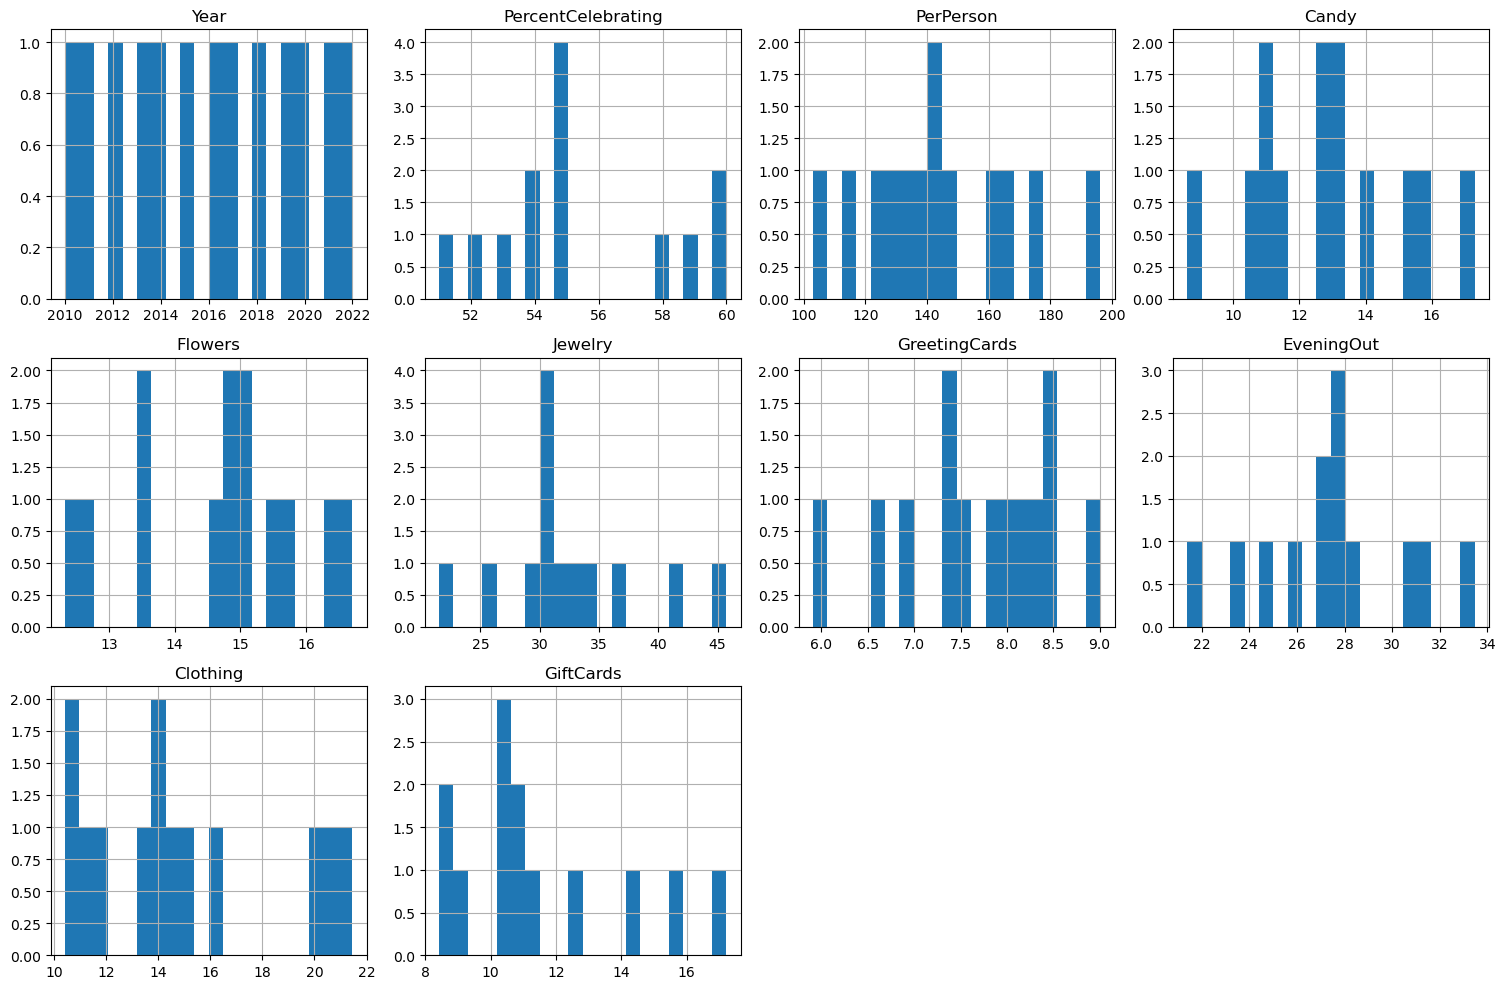

In [48]:
# starting from historical spending 
hs = pd.DataFrame(historical_spending)
hs.hist(bins=20, figsize=(15,10), layout=(3,4))
plt.tight_layout()
plt.show()

## Interpretation
Most of the categories are in normal distribution, only 'clothing' and 'giftcards' show slightly right-skewed in terms of average amount spending ove time. After checking the central tendency such as mean and median, the datasets are good.   

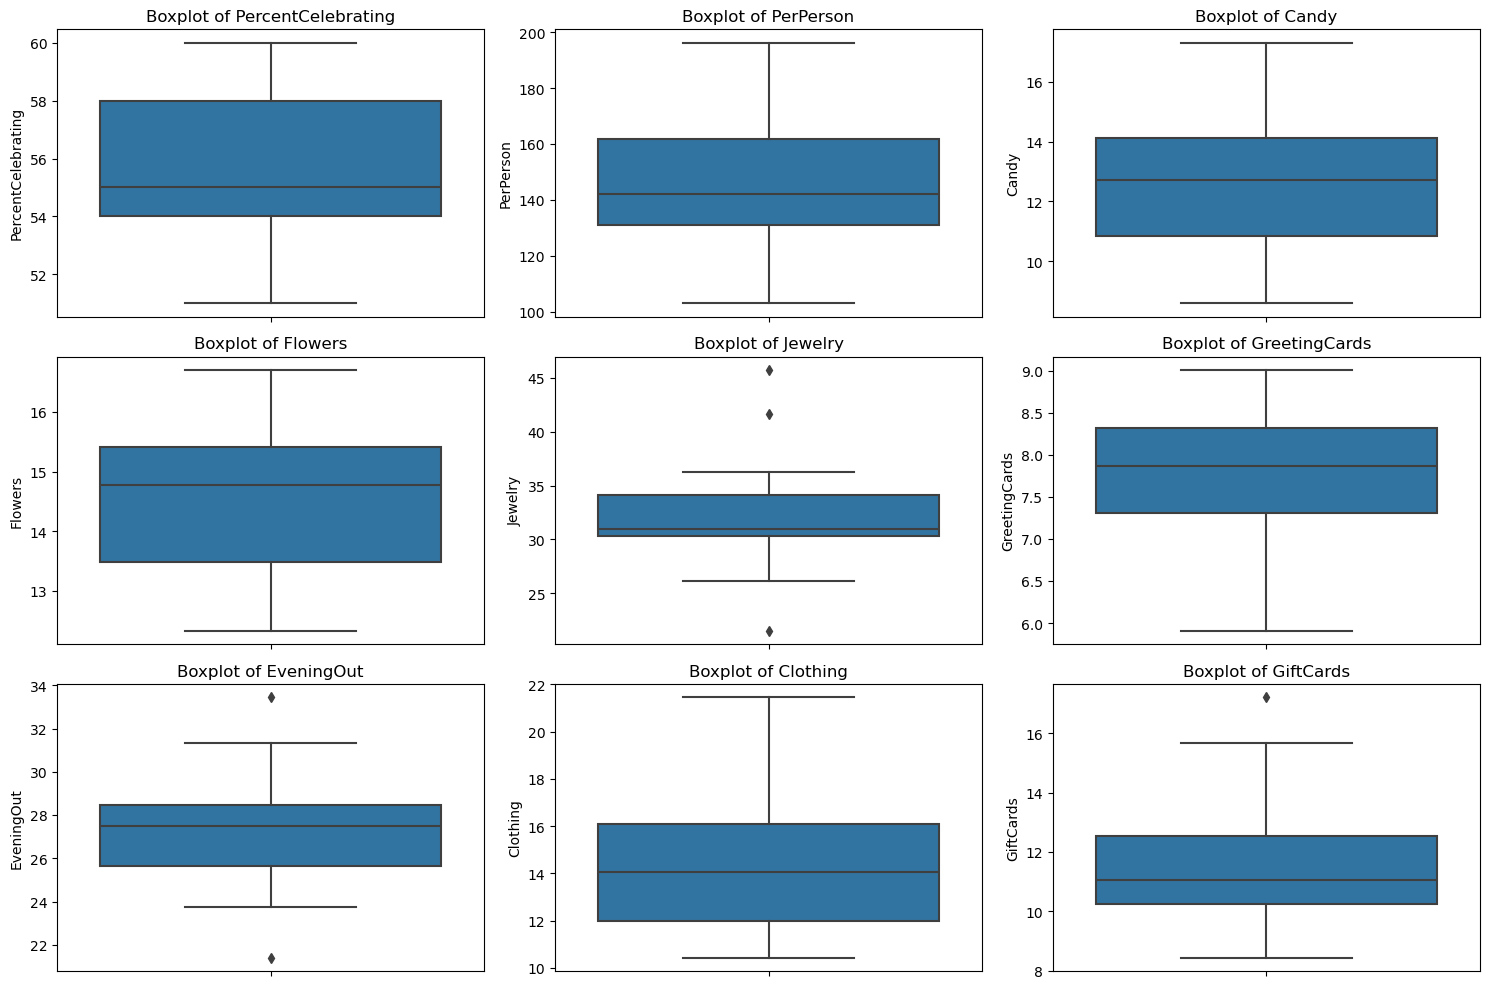

In [59]:
# find outliers
plt.figure(figsize=(15,10))
for i, col in enumerate(hs.columns[1:],1): 
    plt.subplot(3, 3, i)
    sns.boxplot(y=hs[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

## Interpretation
I observed that in terms of the amount spending, the categories 'jewlery', 'eveningout', and 'giftcards' show the sign of outliers. By referencing with the std, these three categories display higher variability within timeframe, and some years existed extremity in terms of highest and lowest spending amount. 

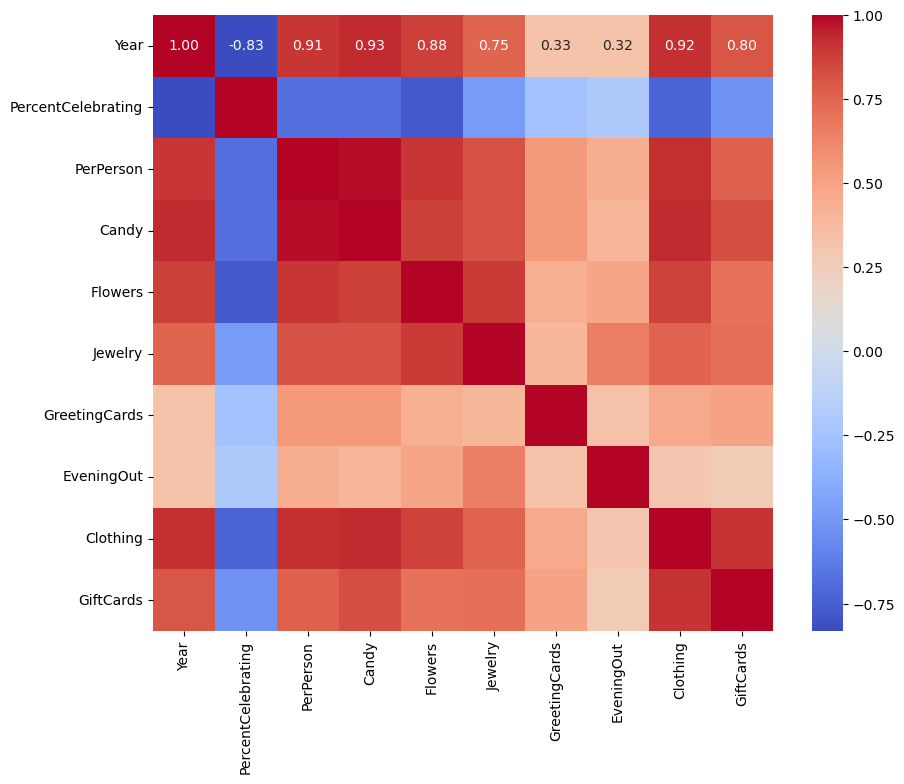

In [63]:
# find correlation with heatmap
corr_matrix = hs.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

## Interpretation
Given the timeframe 2010 to 2022, I can firstly observe there are some popular valentine's categories such as candy, flowers, jewelry, clothing, and giftcards. Secondly, some items might be purchased at the same or close time interval, the combination such as 'candy and clothing', 'flower and jewelry', 'eveningout and jewelry', 'clothing and giftcards'. The combinations are not limited to two, there could be more.  

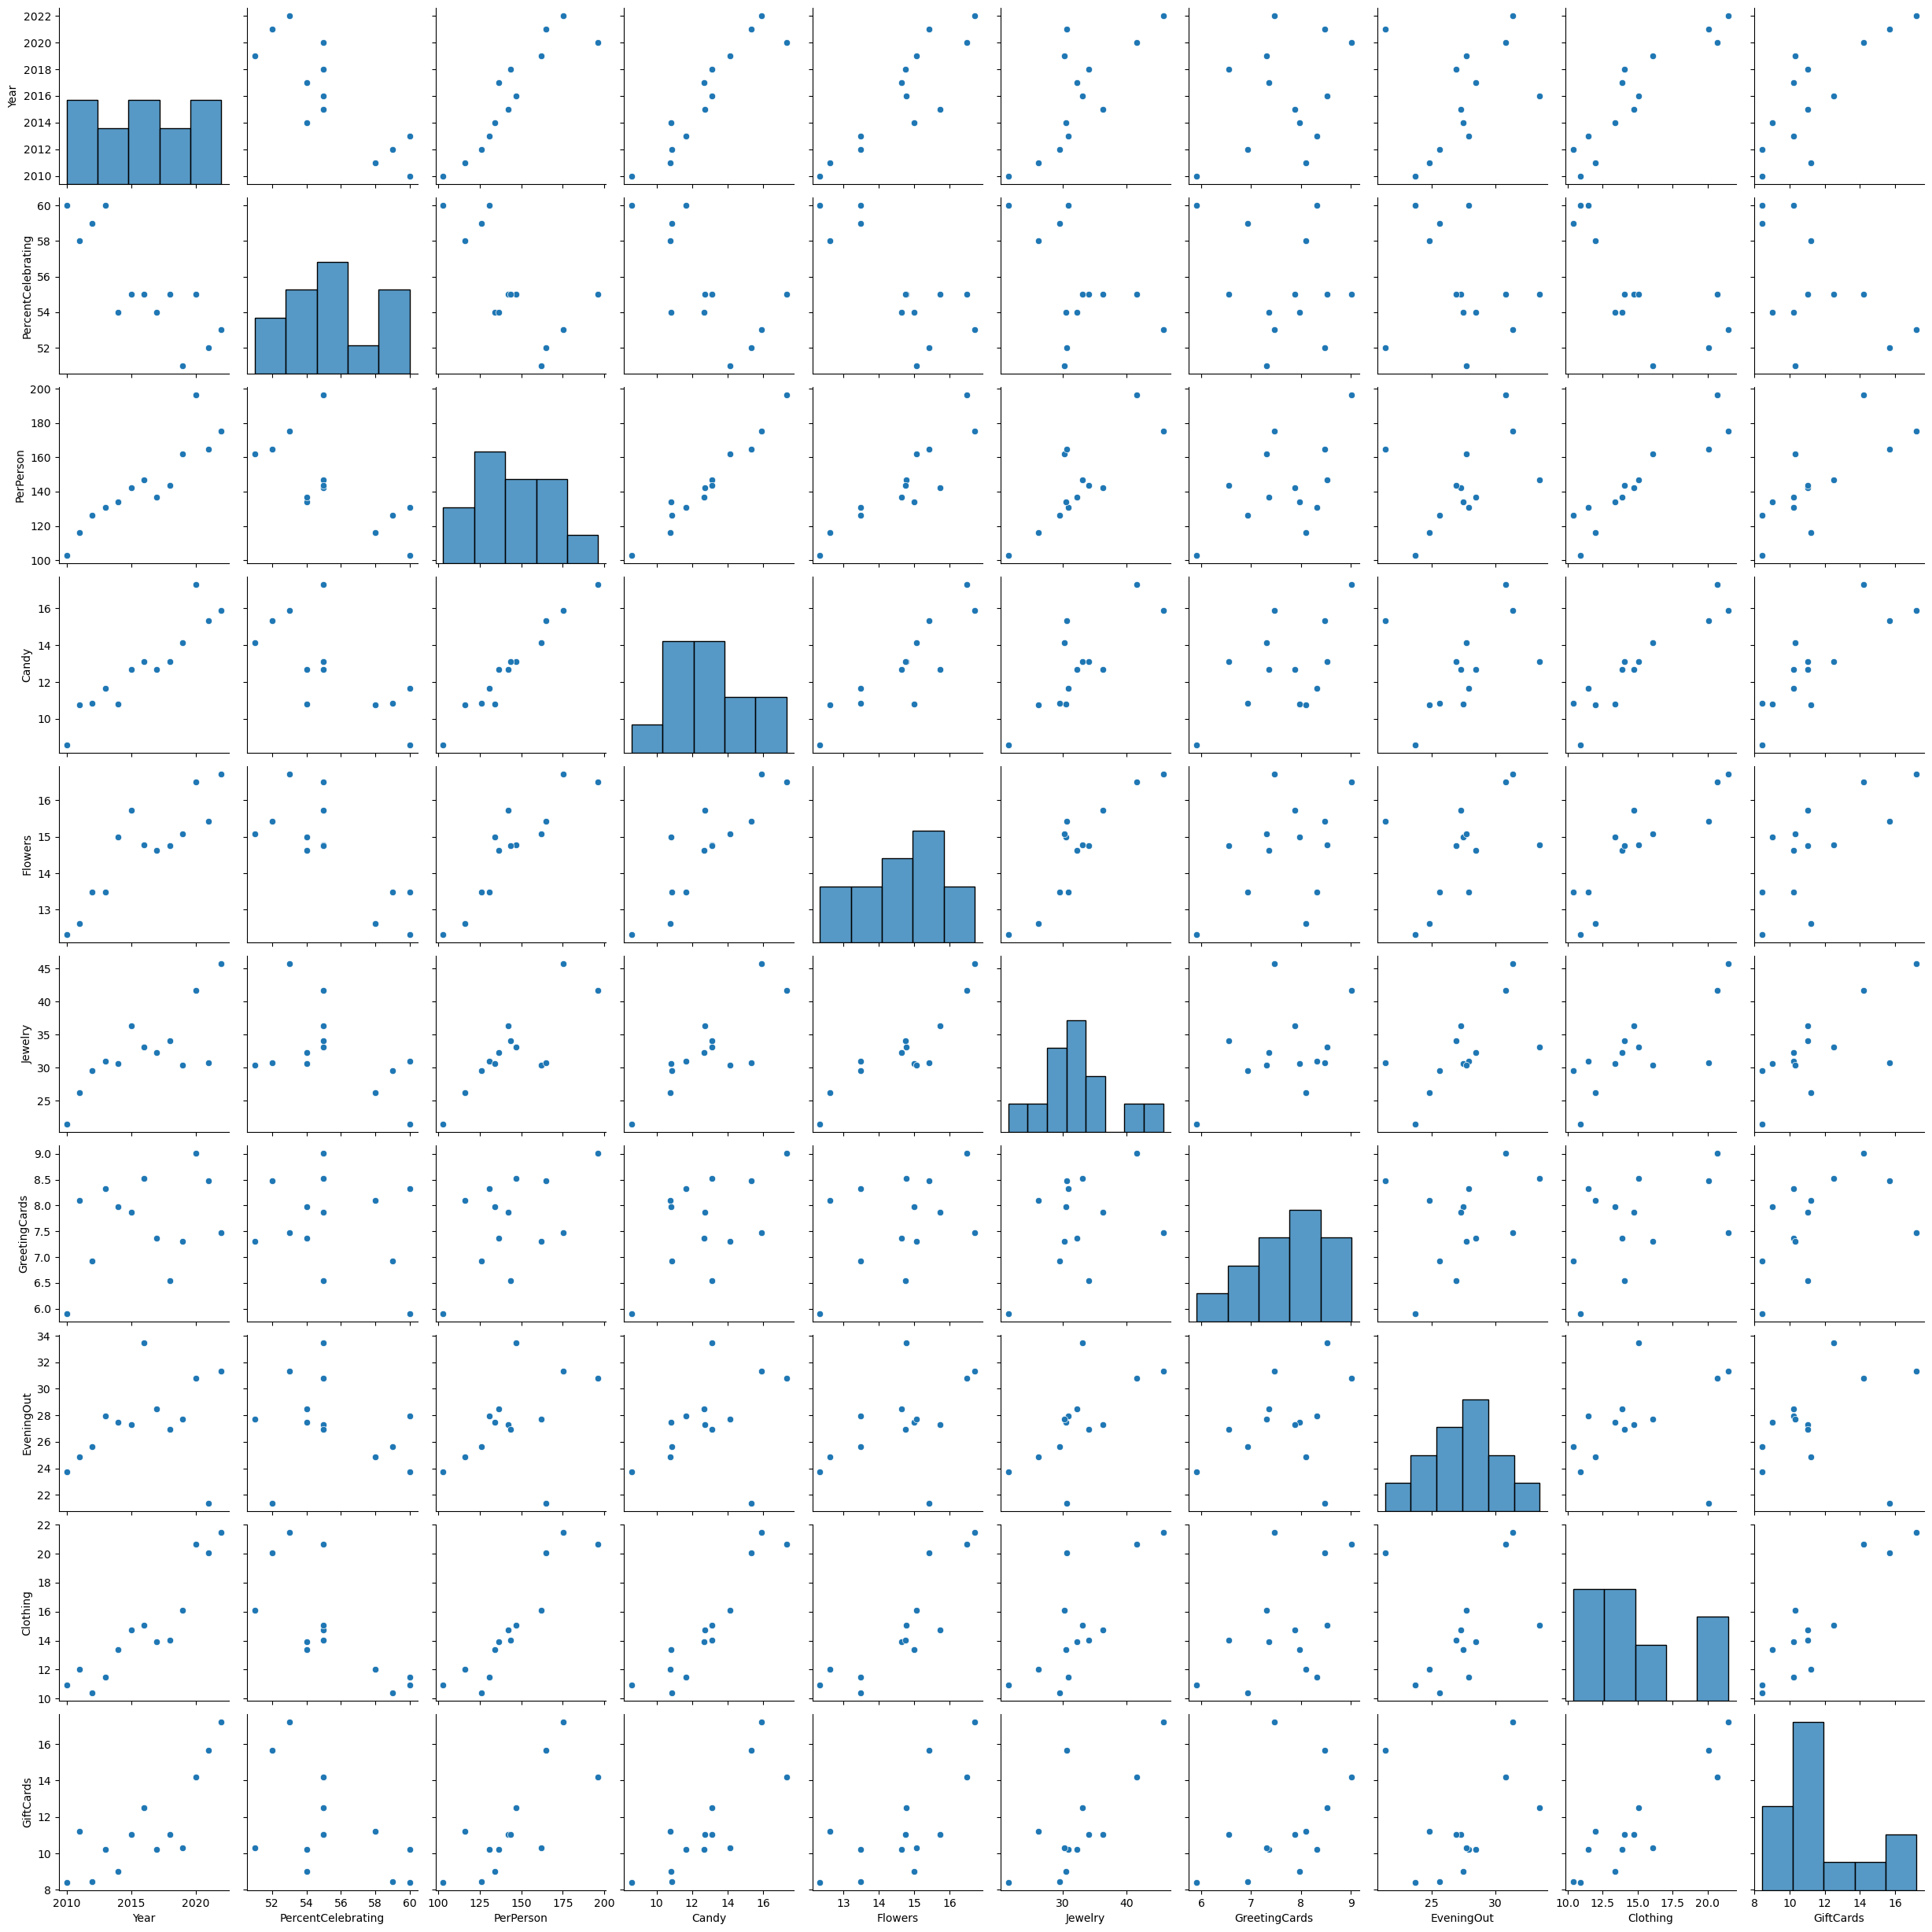

In [65]:
sns.pairplot(hs)
plt.show()

# Interpretation
In pairplot, I observed that in terms of the percentage of celebration, it shows decreasing trend over time. On the other hand, the amount of spending demonstrates an increasing trend as expected. This positive trend includes most of the categories as well.

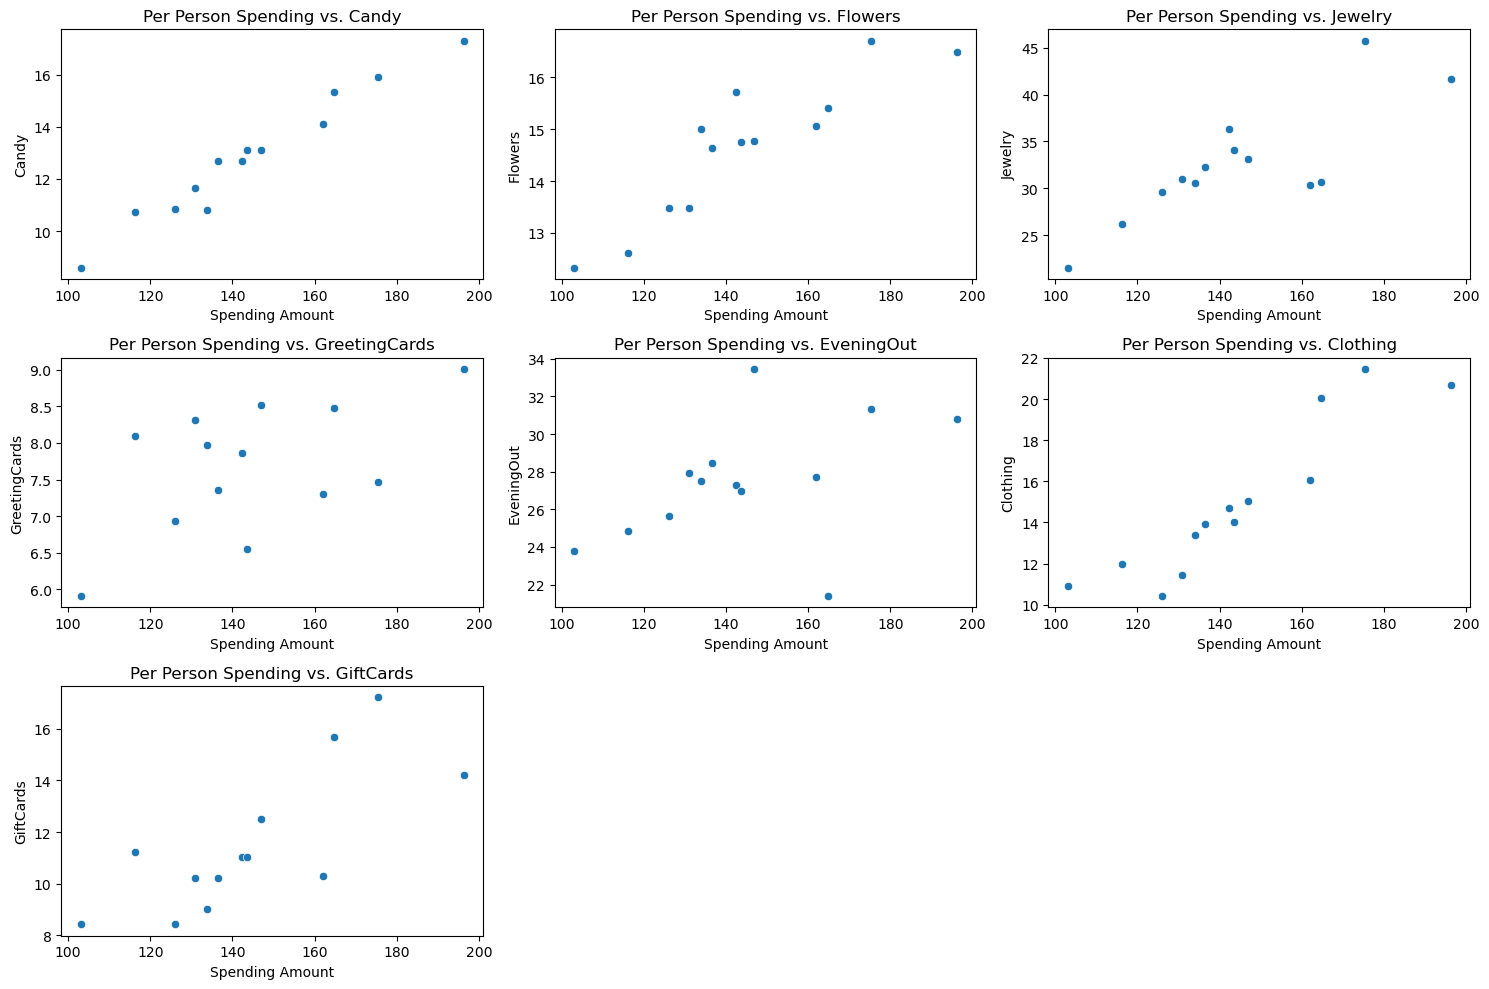

In [69]:
# find relationship between 'PerPerson' spending and other spending categories
spending_categories = ['Candy', 'Flowers', 'Jewelry', 'GreetingCards', 'EveningOut', 'Clothing', 'GiftCards']
plt.figure(figsize=(15,10))
for i, col in enumerate(spending_categories, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=hs['PerPerson'], y=hs[col])
    plt.title(f'Per Person Spending vs. {col}')
    plt.xlabel('Spending Amount')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

# Interpretation
To dive into the relationship between spending amount and each category, This further proves my observation, most of the amount spending in each category show positive increasing trend over time. 

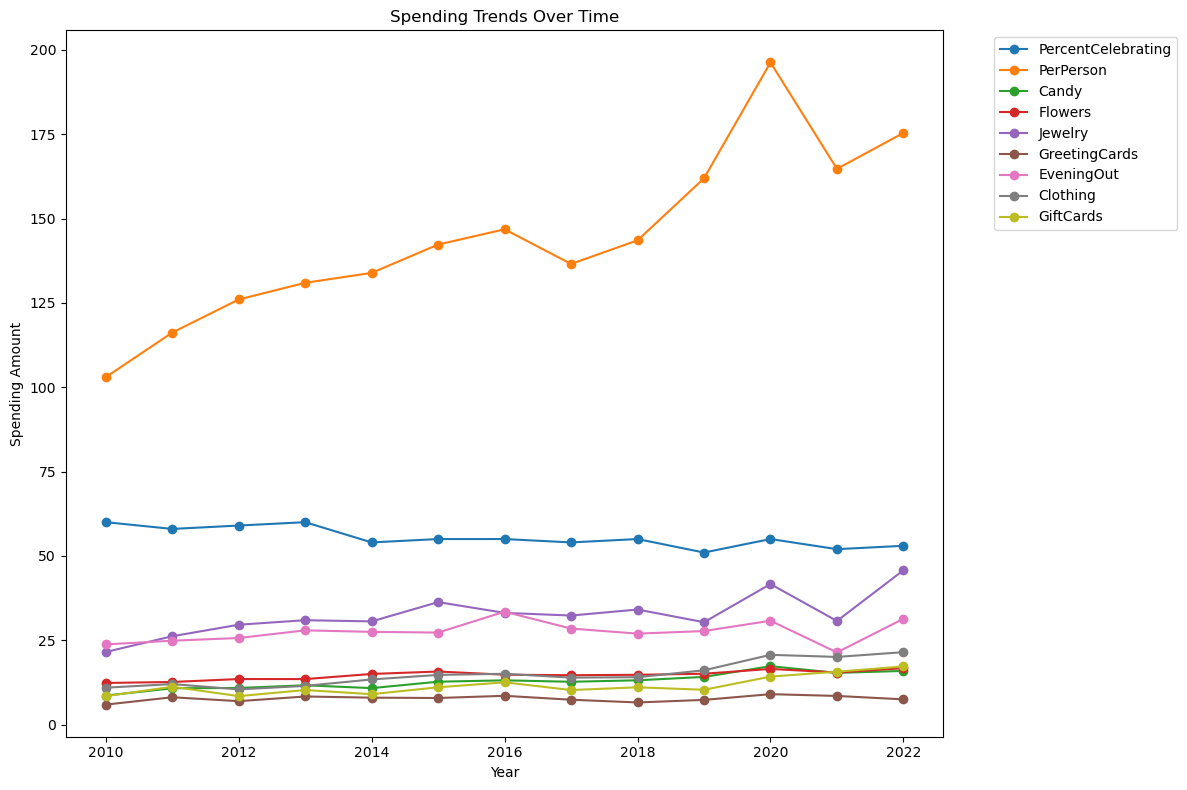

In [73]:
# spending trends over the years
plt.figure(figsize=(12,8))
for col in hs.columns[1:]:
    plt.plot(hs['Year'], hs[col], marker='o', label=col)
plt.xlabel('Year')
plt.ylabel('Spending Amount')
plt.title('Spending Trends Over Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [90]:
# EDA for gifts_age.csv 
ga = pd.DataFrame(gifts_age)

In [92]:
print(ga['Age'].unique())

['18-24' '25-34' '35-44' '45-54' '55-64' '65+']


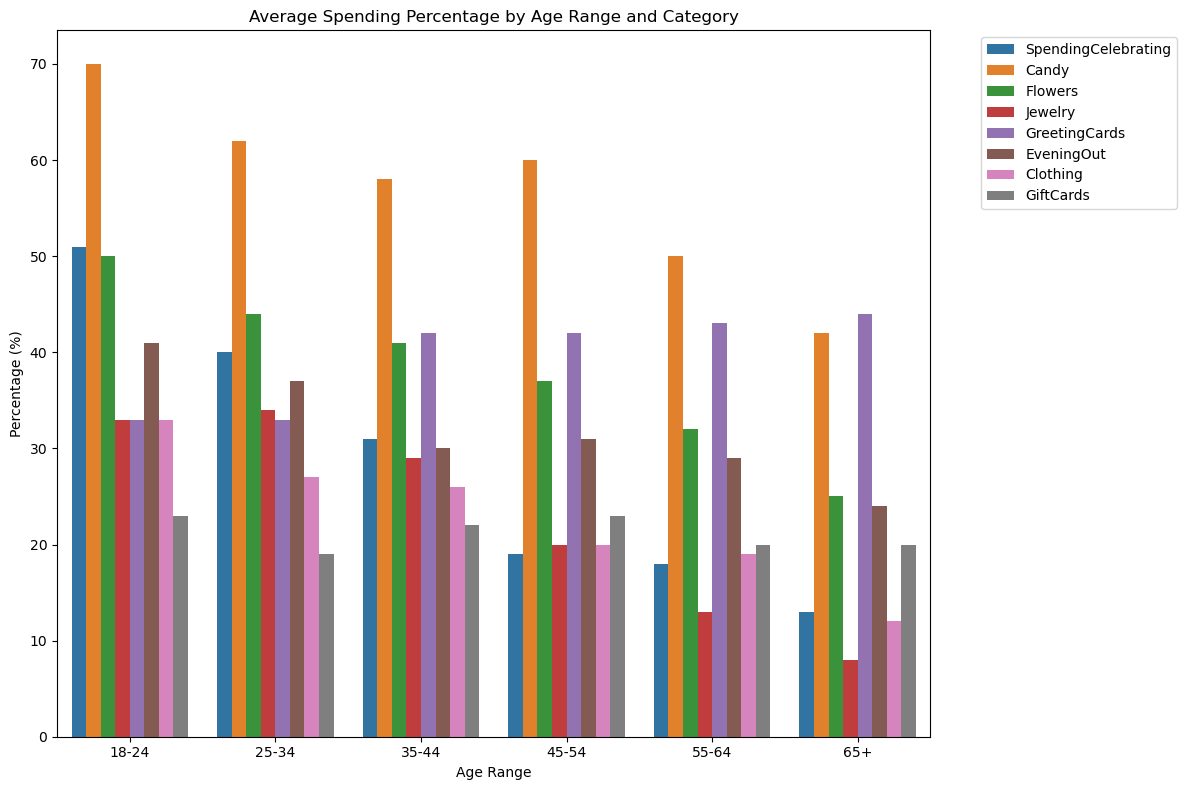

In [110]:
# plot the average percent spending for each category by age range
ga_melted = ga.melt(id_vars='Age', var_name='Category', value_name='AvgSpending')
plt.figure(figsize=(12,8))
sns.barplot(x='Age', y='AvgSpending', hue='Category', data=ga_melted)
plt.title('Average Spending Percentage by Age Range and Category')
plt.xlabel('Age Range')
plt.ylabel('Percentage (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Interpretation 
- Among the age group, I observed that as the age increasing shows the decline of the celebration for Valentine's day, the younger group
celebrates more often, especially among 18-24, meanwhile, the older group 65+ shows the minimal percentage of inclination to celebrate.
- Candy is more popular in young group.
- GreetingCards is getting more popular after 35.
- 18-24 and 25-34 are two main group showing higher percentage in purchasing Jewelry.
- flower, jewlery, eveningout, clothing, spendingcelebrating all show mild declined in average percent spending when people getting older.


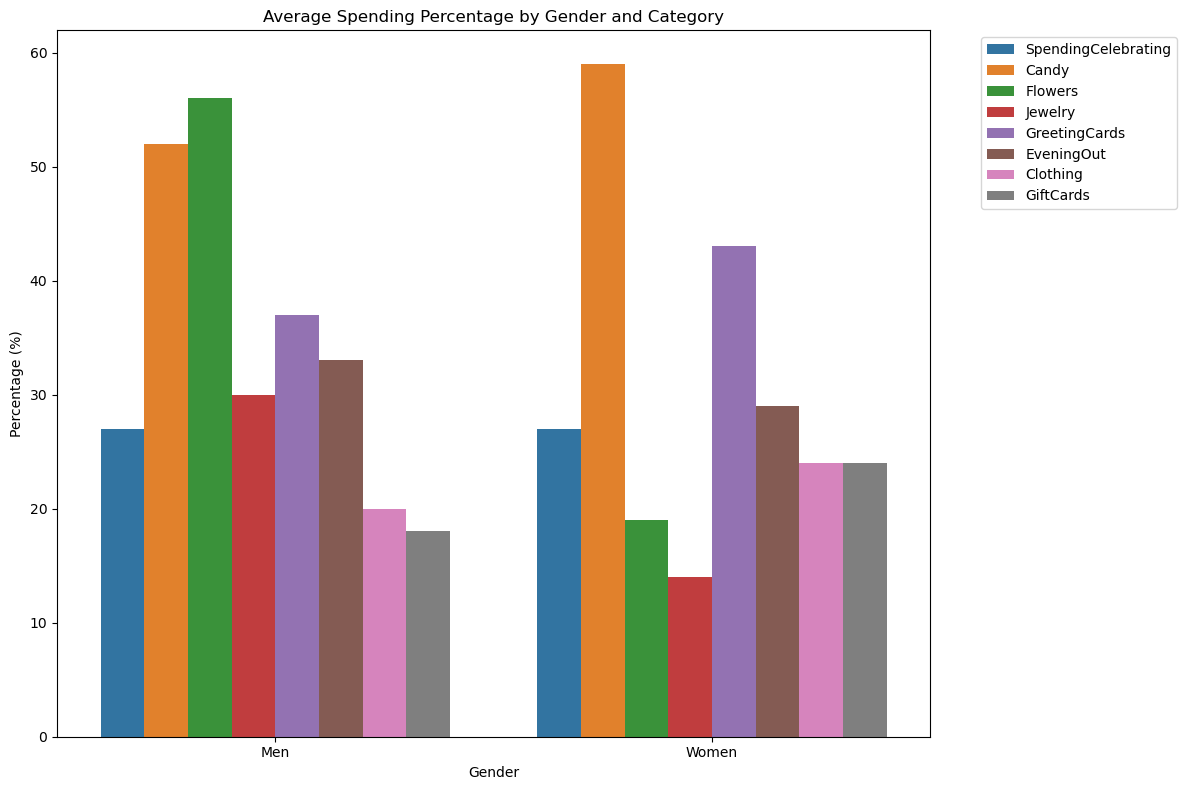

In [122]:
# plot the average percent spending for each category by gender
gg = pd.DataFrame(gifts_gender)

gg_melted = gg.melt(id_vars='Gender', var_name='Category', value_name='AvgSpending')
plt.figure(figsize=(12,8))
sns.barplot(x='Gender', y='AvgSpending', hue='Category', data=gg_melted)
plt.title('Average Spending Percentage by Gender and Category')
plt.xlabel('Gender')
plt.ylabel('Percentage (%)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# Interpretation
- Flower is the most popular choice in the group of male.
- Candy is the most popular choice in the group of female.
- clothing and giftcards are the least favorite in the choice of men.
- jewlery is the least favorite in the choice of women.

## Time-series forecasting with historical_spending.csv

In [27]:
# forecast future demand for 'candy' using the annual aggreated data
from prophet import Prophet
historical_spending.head()

,Year,PercentCelebrating,PerPerson,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,2010,60,103.00,8.60,12.33,21.52,5.91,23.76,10.93,8.42
1,2011,58,116.21,10.75,12.62,26.18,8.09,24.86,12.00,11.21
2,2012,59,126.03,10.85,13.49,29.60,6.93,25.66,10.42,8.43
3,2013,60,130.97,11.64,13.48,30.94,8.32,27.93,11.46,10.23
4,2014,54,133.91,10.80,15.00,30.58,7.97,27.48,13.37,9.00


In [29]:
historical_spending['ds'] = pd.to_datetime(historical_spending['Year'], format='%Y')
historical_spending['y'] = historical_spending['Candy'] # to predict candy
model = Prophet()
model.fit(historical_spending[['ds','y']])
future = model.make_future_dataframe(periods=5, freq='Y')
forecast = model.predict(future)


11:49:00 - cmdstanpy - INFO - Chain [1] start processing
11:49:00 - cmdstanpy - INFO - Chain [1] done processing


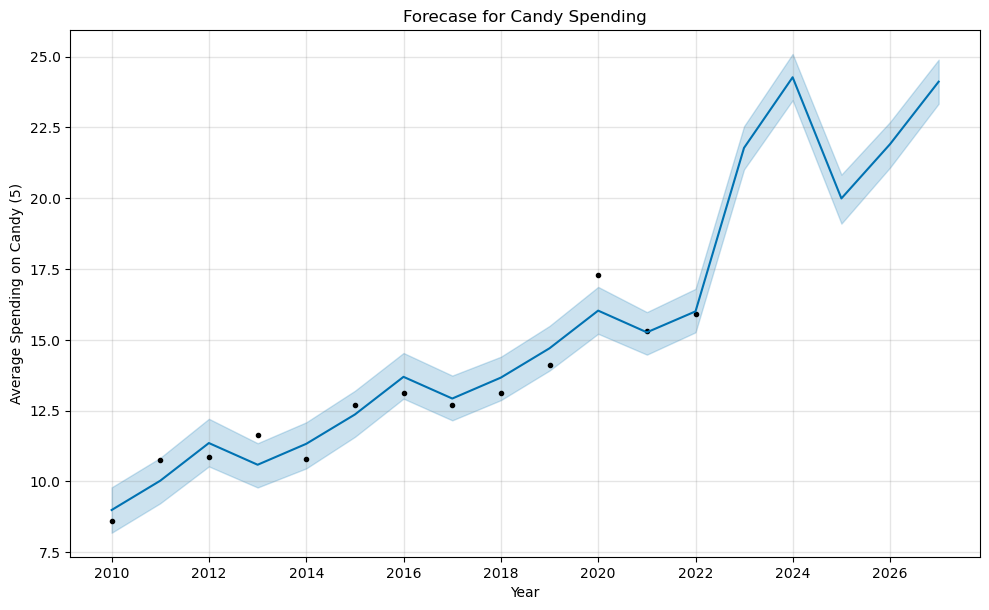

In [31]:
fig = model.plot(forecast)
plt.title('Forecase for Candy Spending')
plt.xlabel('Year')
plt.ylabel('Average Spending on Candy (5)')
plt.show()

# Customer Segmentation 

In [34]:
gifts_age.head()

,Age,SpendingCelebrating,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,18-24,51,70,50,33,33,41,33,23
1,25-34,40,62,44,34,33,37,27,19
2,35-44,31,58,41,29,42,30,26,22
3,45-54,19,60,37,20,42,31,20,23
4,55-64,18,50,32,13,43,29,19,20


In [36]:
# segmentation by age 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

age_order = ['18-24', '25-34', '35-44', '45-54', '55-64', '65+']
gifts_age['Age'] = pd.Categorical(gifts_age['Age'], categories=age_order, ordered=True)

spending_vars = ['SpendingCelebrating', 'Candy', 'Flowers', 'Jewelry', 
                 'GreetingCards', 'EveningOut', 'Clothing', 'GiftCards']

scaler = StandardScaler()
scaled_age = scaler.fit_transform(gifts_age[spending_vars])
kmeans_age = KMeans(n_clusters=3, random_state=42)
gifts_age['Segment'] = kmeans_age.fit_predict(scaled_age)


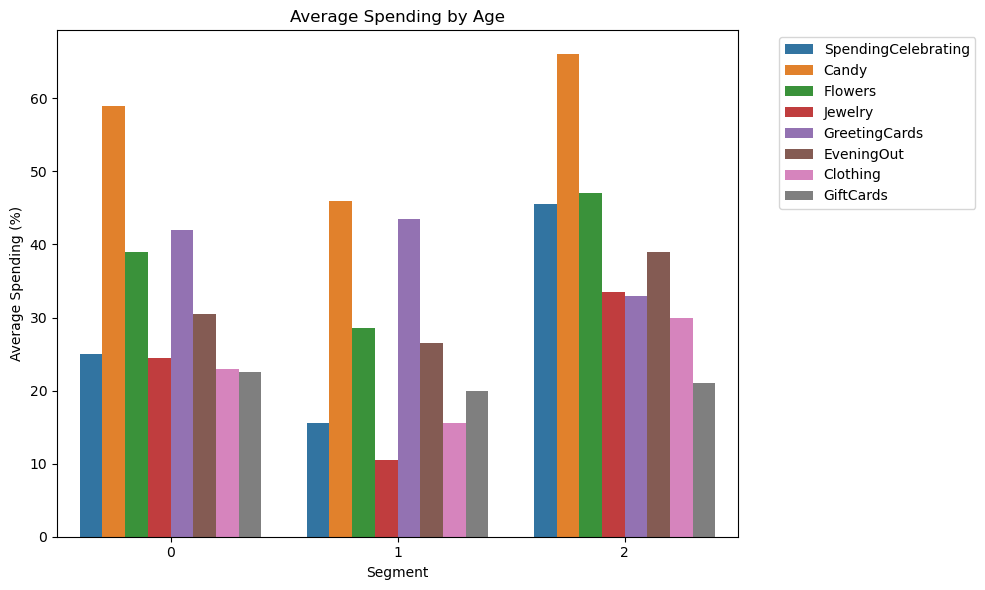

In [38]:
group_age = gifts_age.groupby('Segment')[spending_vars].mean().reset_index()
melted_age = group_age.melt(id_vars='Segment', var_name = 'Category', value_name='AvgSpending')
plt.figure(figsize=(10,6))
sns.barplot(x='Segment', y='AvgSpending', hue='Category',data=melted_age)
plt.title("Average Spending by Age")
plt.xlabel('Segment')
plt.ylabel('Average Spending (%)')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
gifts_age

,Age,SpendingCelebrating,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards,Segment
0,18-24,51,70,50,33,33,41,33,23,2
1,25-34,40,62,44,34,33,37,27,19,2
2,35-44,31,58,41,29,42,30,26,22,0
3,45-54,19,60,37,20,42,31,20,23,0
4,55-64,18,50,32,13,43,29,19,20,1
5,65+,13,42,25,8,44,24,12,20,1


# Interpretation
- By applying K-Means partitioning the age groups into clusters and these same clusters have similar spending profiles. 
- segment 0: high in candy, flower, greetingcards, and eveningout, moderate on the rest.
- segemnt 1: lower overall spending except for a spike in greetingcards.
- segment 2: highest in candy, flower, jewelry, eveningout, clothing.

In [33]:
# export to csv.file
historical_spending.to_csv('cleaned_hisotrical_spending.csv', index=False)
gifts_age.to_csv('cleaned_gifts_age.csv',index=False)
gifts_gender.to_csv('cleaned_gifts_gender.csv',index=False)